In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import lightgbm as lgb
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [42]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [44]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [45]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [46]:
df.drop(columns=['Id'],inplace=True)

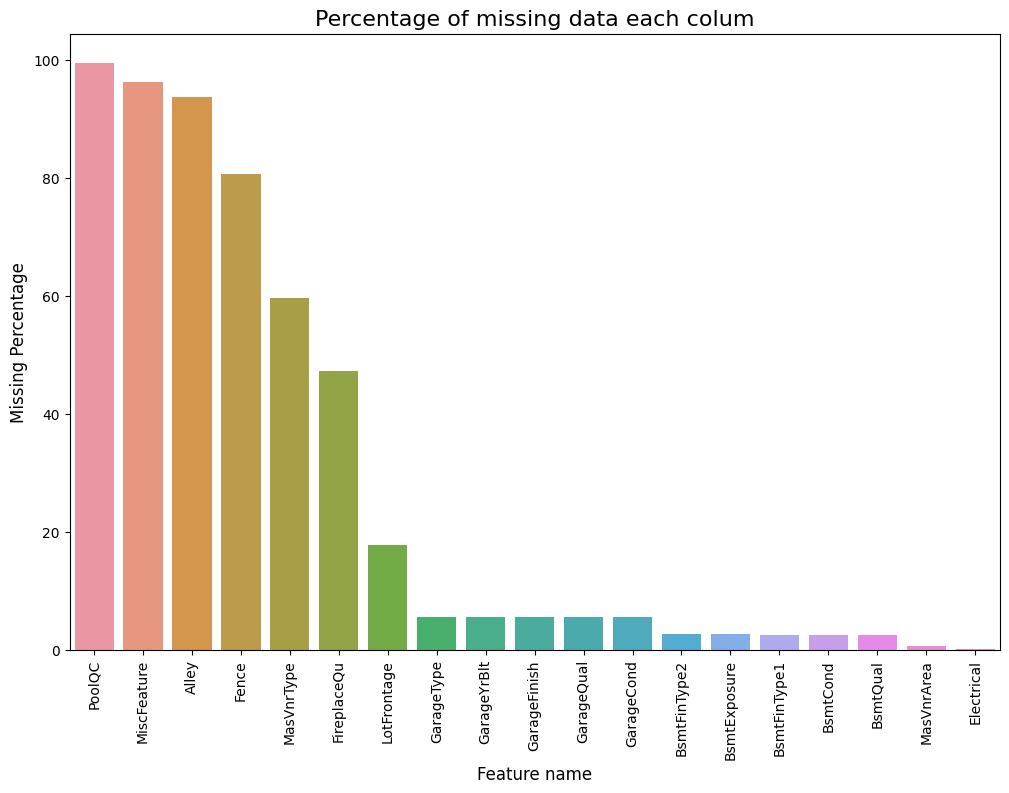

In [47]:
missing_percentage = (df.isnull().sum() / len(df))*100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x=missing_percentage.index, y=missing_percentage)
plt.xticks(rotation=90)
plt.title('Percentage of missing data each colum', fontsize=16)
plt.xlabel('Feature name',fontsize=12)
plt.ylabel('Missing Percentage', fontsize=12)
plt.show()

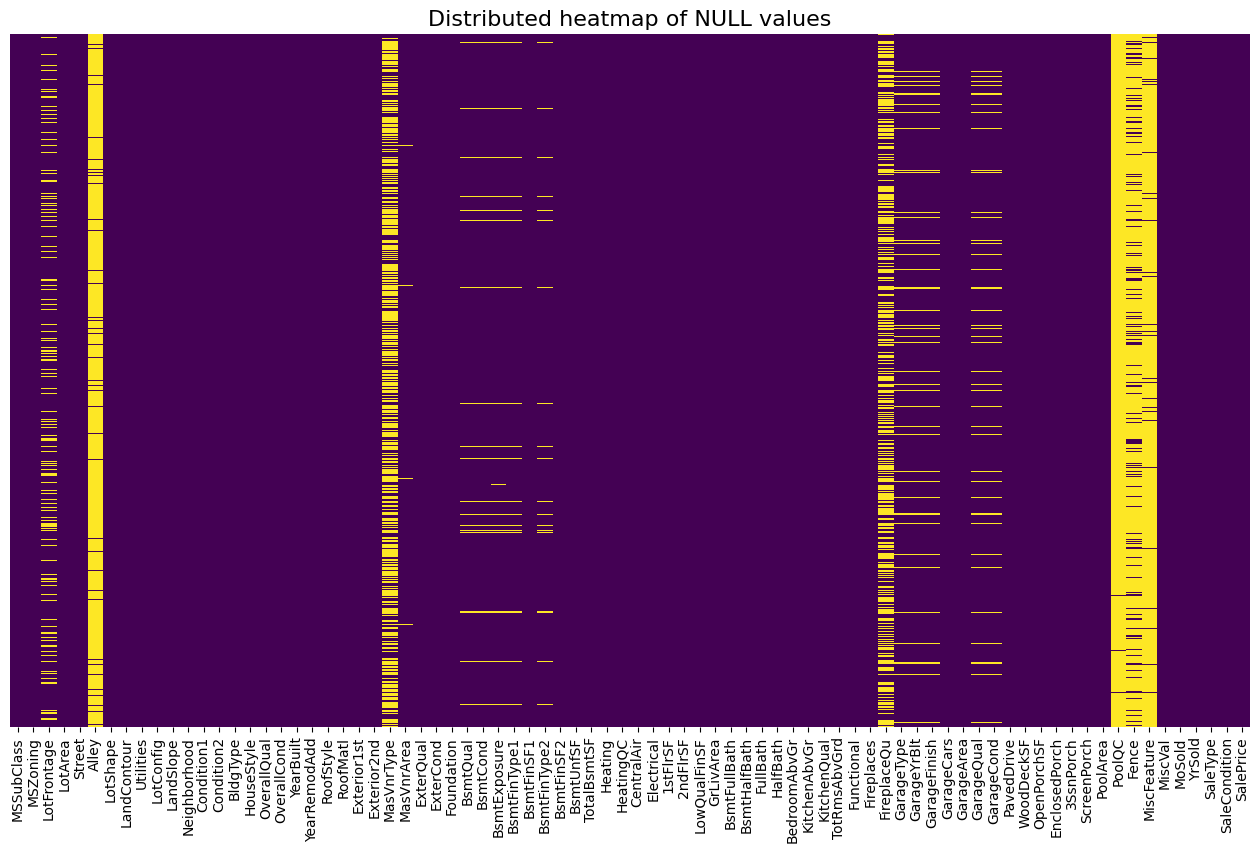

In [48]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Distributed heatmap of NULL values', fontsize=16)
plt.show()

# EDA

---EDA PROCESS---


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


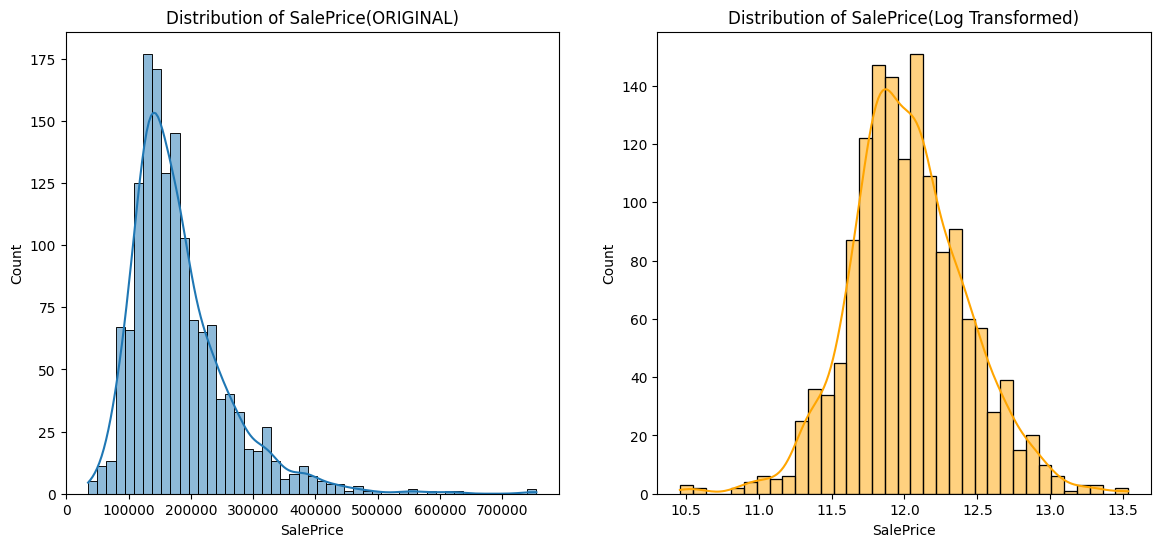

In [49]:
TARGET_COL = 'SalePrice'

RANDOM_STATE = 42

print("---EDA PROCESS---")

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(df[TARGET_COL], kde=True)
plt.title(f"Distribution of {TARGET_COL}(ORIGINAL)")

df[TARGET_COL]= np.log1p(df[TARGET_COL])

plt.subplot(1,2,2)
sns.histplot(df[TARGET_COL], kde=True, color='orange')
plt.title(f"Distribution of {TARGET_COL}(Log Transformed)")
plt.show()

### Ở VỊ TRÍ XỬ LÝ NÀY PHẢI XÁC ĐỊNH LẠI ĐÚNG VÌ CÓ 1 SỐ FEATURE MẶC DÙ LÀ NUMERIC NHƯNG THỰC CHẤT LÀ CATEGORY THEO BẢNG MÔ TẢ

In [50]:
print("\n Top ?? features achieving hightest correlation with SalePrice")
corr_matrix = df.corr(numeric_only=True)
top_corr_features = corr_matrix[TARGET_COL].abs().sort_values(ascending=False).index[1:30]
print(corr_matrix[TARGET_COL].loc[top_corr_features])


 Top ?? features achieving hightest correlation with SalePrice
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
EnclosedPorch   -0.149050
KitchenAbvGr    -0.147548
ScreenPorch      0.121208
MSSubClass      -0.073959
PoolArea         0.069798
MoSold           0.057330
Name: SalePrice, dtype: float64


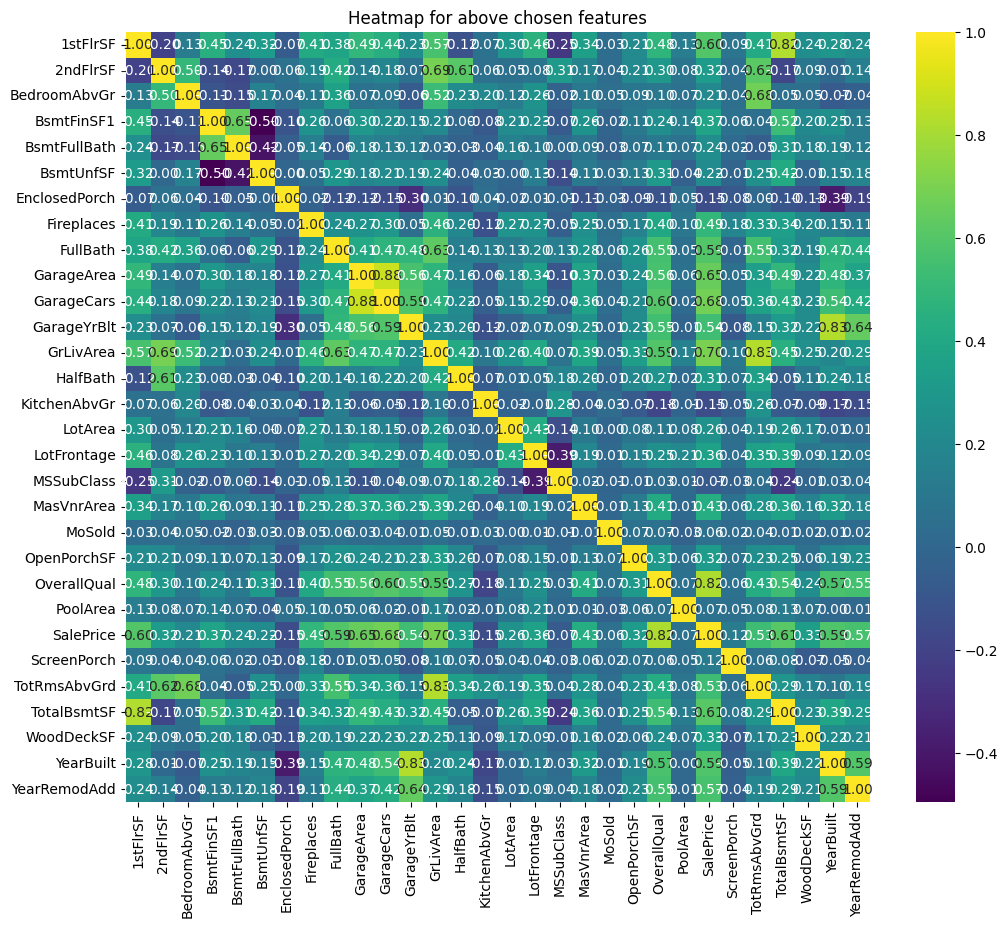

In [51]:
plt.figure(figsize=(12,10))
sns.heatmap(df[top_corr_features.union([TARGET_COL])].corr(numeric_only=True), annot=True, cmap='viridis', fmt='.2f')
plt.title('Heatmap for above chosen features')
plt.show()

# Preprocess and Feature Engineer

In [52]:
y = df[TARGET_COL]
X = df.drop(TARGET_COL, axis=1)

numeric_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(exclude=np.number).columns.tolist()
print(f"Finding {len(numeric_features)} numeric features.")
print(f"Finding {len(categorical_features)} categorical features.")

Finding 36 numeric features.
Finding 43 categorical features.


In [53]:
####MEDIAN FILLING TO NULL
num_imputer = SimpleImputer(strategy='median')
X[numeric_features] = num_imputer.fit_transform(X[numeric_features])

### MISSING WITH CATEGORY
cat_imputer = SimpleImputer(strategy='constant', fill_value='Missing')
X[categorical_features] = cat_imputer.fit_transform(X[categorical_features])


###### Dưới đây nên xem xét các chiến lược xử lý kahcs như TOTALSF  = TOTALBSMTSF + 1stFlrSF+ 2ndFLRSF
###### xử lý đúng các giá trị value numeric và category như đề cập ở trên

# 3. Ví dụ về Feature Engineering (bạn cần điều chỉnh tên cột cho đúng với file của bạn)
# Bỏ comment và sửa tên cột nếu file của bạn có các cột này
# if 'TotalBsmtSF' in X.columns and '1stFlrSF' in X.columns and '2ndFlrSF' in X.columns:
#     X['TotalSF'] = X['TotalBsmtSF'] + X['1stFlrSF'] + X['2ndFlrSF']
#     numeric_features.append('TotalSF') # Đừng quên thêm feature mới vào list
# if 'YrSold' in X.columns and 'YearBuilt' in X.columns:
#     X['HouseAge'] = X['YrSold'] - X['YearBuilt']
#     numeric_features.append('HouseAge


# 4. Xử lý độ lệch (skewness) cho các feature số
# Tìm các feature bị lệch (ngưỡng > 0.75)
skewed_feats = X[numeric_features].apply(lambda x:x.skew()).sort_values(ascending=False)
skewed_feats = skewed_feats[abs(skewed_feats) > 0.75]
print(f"\nTìm thấy {len(skewed_feats)} features số bị lệch cần transform: \n{skewed_feats.index.tolist()}")
for feat in skewed_feats.index:
    X[feat] = np.log1p(X[feat])
    


Tìm thấy 21 features số bị lệch cần transform: 
['MiscVal', 'PoolArea', 'LotArea', '3SsnPorch', 'LowQualFinSF', 'KitchenAbvGr', 'BsmtFinSF2', 'ScreenPorch', 'BsmtHalfBath', 'EnclosedPorch', 'MasVnrArea', 'LotFrontage', 'OpenPorchSF', 'BsmtFinSF1', 'WoodDeckSF', 'TotalBsmtSF', 'MSSubClass', '1stFlrSF', 'GrLivArea', 'BsmtUnfSF', '2ndFlrSF']


In [54]:
###### One Hot position category
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)
print(f"\nSố lượng features sau khi one hot encoding:{X.shape[1]}")



Số lượng features sau khi one hot encoding:260


# PHÂN CHIA DATA TRAIN/TEST

In [55]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
print(f"Kích thước tập huấn luyện: {X_train.shape}")
print(f"Kích thước tập kiểm tra: {X_test.shape}")


Kích thước tập huấn luyện: (1168, 260)
Kích thước tập kiểm tra: (292, 260)


In [56]:
print("\n ---Begin Training LightGBM model")
model = lgb.LGBMRegressor(
    objective='regression',
    num_leaves=31,
    learning_rate=0.05,
    n_estimators = 1000,
    random_state=RANDOM_STATE
)
model.fit(X_train, y_train,
         eval_set=[(X_test, y_test)],
         eval_metric='rmse',
         callbacks=[lgb.early_stopping(100, verbose=False)])


 ---Begin Training LightGBM model
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000640 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3170
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 169
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 12.030658


LGBMRegressor(learning_rate=0.05, n_estimators=1000, objective='regression',
              random_state=42)

# Evaluate

In [6]:
print("\n---Begin evaluate---")
y_pred_log = model.predict(X_test)

y_test_orig = np.expm1(y_test)
y_pred_orig = np.expm1(y_pred_log)

rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred_orig))
mae = mean_absolute_error(y_test_orig, y_pred_orig)
r2 = r2_score(y_test_orig, y_pred_orig)

print(f"Kết quả đánh giá trên tập Test:")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"R-squared (R²): {r2:.4f}")

# Trực quan hóa kết quả
plt.figure(figsize=(10, 8))
plt.scatter(y_test_orig, y_pred_orig, alpha=0.5)
plt.plot([min(y_test_orig), max(y_test_orig)], [min(y_test_orig), max(y_test_orig)], color='red', linestyle='--')
plt.xlabel('Giá thực tế (Actual Price)')
plt.ylabel('Giá dự đoán (Predicted Price)')
plt.title('Giá thực tế vs. Giá dự đoán')
plt.grid(True)
plt.show()

# Hiển thị các feature quan trọng nhất
lgb.plot_importance(model, max_num_features=15, figsize=(10, 8))
plt.title('Top 20 Feature quan trọng nhất theo LightGBM')
plt.show()


---Begin evaluate---


NameError: name 'y_test' is not defined

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import lightgbm as lgb

# --- CÀI ĐẶT BAN ĐẦU ---
# Tải dữ liệu từ 2 file riêng biệt
try:
    df_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
    df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
except FileNotFoundError:
    print("Lỗi: Vui lòng đảm bảo bạn có file 'train.csv' và 'test.csv' trong cùng thư mục.")
    # Tạo DataFrame giả để code có thể chạy ví dụ
    df_train = pd.DataFrame(np.random.rand(100, 5), columns=[f'feat_{i}' for i in range(5)])
    df_train['SalePrice'] = np.random.rand(100) * 100000
    df_test = pd.DataFrame(np.random.rand(50, 5), columns=[f'feat_{i}' for i in range(5)])
    df_test['Id'] = range(100, 150)


# Vui lòng thay 'SalePrice' bằng tên cột giá nhà thực tế
TARGET_COL = 'SalePrice'
# Giả sử cả 2 file đều có cột ID, dùng để tạo file submission
ID_COL = 'Id'

RANDOM_STATE = 42

print("--- Dữ liệu đã được tải thành công ---")
print(f"Kích thước tập Train: {df_train.shape}")
print(f"Kích thước tập Test: {df_test.shape}")

# Lưu lại ID của tập test để dùng ở cuối
test_ids = df_test[ID_COL]
# Lưu lại số dòng của tập train để tách ra sau này
ntrain = df_train.shape[0]


# --- BƯỚC 1 & 2: EDA (Thực hiện trên tập train) ---
# (Phần EDA giữ nguyên như trước, vì chúng ta chỉ khám phá trên dữ liệu đã biết)
# ... (Bạn có thể copy phần EDA từ code trước vào đây nếu muốn) ...
# Trong phiên bản này, ta sẽ đi thẳng vào xử lý dữ liệu.

# --- BƯỚC 3: TIỀN XỬ LÝ & FEATURE ENGINEERING (Trên cả 2 tập) ---

print("\n--- Bắt đầu Tiền xử lý và Feature Engineering ---")

# 1. Log transform biến mục tiêu (chỉ trên tập train)
df_train[TARGET_COL] = np.log1p(df_train[TARGET_COL])
y_train = df_train[TARGET_COL]

# 2. Gộp 2 tập dữ liệu để xử lý đồng nhất
# Bỏ cột ID và cột target ra khỏi dữ liệu train
df_train_features = df_train.drop([ID_COL, TARGET_COL], axis=1)
df_test_features = df_test.drop(ID_COL, axis=1)
all_data = pd.concat((df_train_features, df_test_features)).reset_index(drop=True)

print(f"Kích thước dữ liệu gộp: {all_data.shape}")

# 3. Tự động xác định các cột số và cột category trên dữ liệu gộp
numeric_features = all_data.select_dtypes(include=np.number).columns.tolist()
categorical_features = all_data.select_dtypes(exclude=np.number).columns.tolist()
print(f"Tìm thấy {len(numeric_features)} features số.")
print(f"Tìm thấy {len(categorical_features)} features category.")


# 4. Xử lý Missing Values
num_imputer = SimpleImputer(strategy='median')
all_data[numeric_features] = num_imputer.fit_transform(all_data[numeric_features])

cat_imputer = SimpleImputer(strategy='constant', fill_value='Missing')
all_data[categorical_features] = cat_imputer.fit_transform(all_data[categorical_features])


# 5. Xử lý độ lệch (skewness) cho các feature số
skewed_feats = all_data[numeric_features].apply(lambda x: x.skew())
skewed_feats = skewed_feats[abs(skewed_feats) > 0.75]
for feat in skewed_feats.index:
    all_data[feat] = np.log1p(all_data[feat])

# 6. Mã hóa One-Hot cho các feature category
all_data = pd.get_dummies(all_data, columns=categorical_features, drop_first=True)
print(f"Số lượng features cuối cùng sau khi xử lý: {all_data.shape[1]}")


# 7. Tách dữ liệu trở lại thành tập train và test
X_train = all_data[:ntrain]
X_test = all_data[ntrain:]

print(f"\nKích thước tập huấn luyện cuối cùng: {X_train.shape}")
print(f"Kích thước tập kiểm tra cuối cùng: {X_test.shape}")

# --- BƯỚC 4: XÂY DỰNG VÀ HUẤN LUYỆN MÔ HÌNH ---

print("\n--- Bắt đầu Huấn luyện mô hình LightGBM trên TOÀN BỘ tập train ---")
model = lgb.LGBMRegressor(objective='regression',
                          num_leaves=31,
                          learning_rate=0.05,
                          n_estimators=1000,
                          force_row_wise=True,
                          random_state=RANDOM_STATE)

# Huấn luyện mô hình trên toàn bộ dữ liệu train
model.fit(X_train, y_train)
print("--- Huấn luyện hoàn tất ---")


# --- BƯỚC 5: DỰ ĐOÁN TRÊN TẬP TEST ---

print("\n--- Bắt đầu dự đoán trên tập test ---")
# Dự đoán trên tập test (kết quả ở dạng log)
predictions_log = model.predict(X_test)

# Chuyển đổi kết quả dự đoán về thang đo ban đầu
final_predictions = np.expm1(predictions_log)


# --- BƯỚC 6: TẠO FILE SUBMISSION ---

print("\n--- Bắt đầu tạo file submission ---")
submission_df = pd.DataFrame({
    ID_COL: test_ids,         # Cột 'Id'
    TARGET_COL: final_predictions  # Cột 'SalePrice'
})

# Làm tròn giá cho đẹp hơn (tùy chọn)
submission_df[TARGET_COL] = submission_df[TARGET_COL].round(2)

# Lưu file
submission_df.to_csv('submission.csv', index=False)

print("\nĐã tạo thành công file 'submission.csv'!")
print("Xem 5 dòng đầu của file submission:")
print(submission_df.head())

--- Dữ liệu đã được tải thành công ---
Kích thước tập Train: (1460, 81)
Kích thước tập Test: (1459, 80)

--- Bắt đầu Tiền xử lý và Feature Engineering ---
Kích thước dữ liệu gộp: (2919, 79)
Tìm thấy 36 features số.
Tìm thấy 43 features category.
Số lượng features cuối cùng sau khi xử lý: 267

Kích thước tập huấn luyện cuối cùng: (1460, 267)
Kích thước tập kiểm tra cuối cùng: (1459, 267)

--- Bắt đầu Huấn luyện mô hình LightGBM trên TOÀN BỘ tập train ---
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 3437
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 176
[LightGBM] [Info] Start training from score 12.024057
--- Huấn luyện hoàn tất ---

--- Bắt đầu dự đoán trên tập test ---

--- Bắt đầu tạo file submission ---

Đã tạo thành công file 'submission.csv'!
Xem 5 dòng đầu của file submission:
     Id  SalePrice
0  1461  122415.76
1  1462  155032.59
2  1463  186833.33
3  1464  192523.31
4  1